# Predictors/depth heatmap
> How robust to these hyperparameters are we?

In [9]:
from HoroRF.datasets.polblogs_hypll import get_training_data, get_testing_data
from src.hyperdt.conversions import convert
from src.hyperdt.forest import HyperbolicRandomForestClassifier
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

X, y = get_training_data(class_label=2, seed=0)
X = convert(X.numpy(), initial="poincare", final="hyperboloid")
y = y.numpy()

cv = list(KFold(n_splits=5, shuffle=True, random_state=0).split(X))

In [11]:
max_depth = [0, 1, 2, 3, 4, 5, 6]
n_predictors = [1, 2, 4, 8, 16, 32, 64, 128]

results = {}
bar = tqdm(total=len(max_depth) * len(n_predictors) * 5)
for depth in max_depth:
    for n in n_predictors:
        results[(depth, n)] = []
        for train_index, test_index in cv:
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = HyperbolicRandomForestClassifier(max_depth=depth, n_estimators=n, random_state=0)
            model.fit(X_train, y_train)
            results[(depth, n)].append(model.score(X_test, y_test))
            bar.update(1)

results

  0%|          | 0/280 [00:00<?, ?it/s]

{(0, 1): [0.4387755102040816,
  0.45918367346938777,
  0.5,
  0.49489795918367346,
  0.4461538461538462],
 (0, 2): [0.4387755102040816,
  0.45918367346938777,
  0.5,
  0.5051020408163265,
  0.4461538461538462],
 (0, 4): [0.4387755102040816,
  0.45918367346938777,
  0.5,
  0.49489795918367346,
  0.4461538461538462],
 (0, 8): [0.4387755102040816,
  0.45918367346938777,
  0.5,
  0.49489795918367346,
  0.4461538461538462],
 (0, 16): [0.4387755102040816,
  0.5408163265306123,
  0.5,
  0.49489795918367346,
  0.4461538461538462],
 (0, 32): [0.4387755102040816,
  0.45918367346938777,
  0.5,
  0.49489795918367346,
  0.4461538461538462],
 (0, 64): [0.4387755102040816,
  0.5408163265306123,
  0.5,
  0.49489795918367346,
  0.4461538461538462],
 (0, 128): [0.4387755102040816,
  0.5408163265306123,
  0.5,
  0.49489795918367346,
  0.4461538461538462],
 (1, 1): [0.7704081632653061,
  0.7959183673469388,
  0.7806122448979592,
  0.7448979591836735,
  0.7794871794871795],
 (1, 2): [0.7602040816326531,
  

<Axes: xlabel='n_predictors', ylabel='max_depth'>

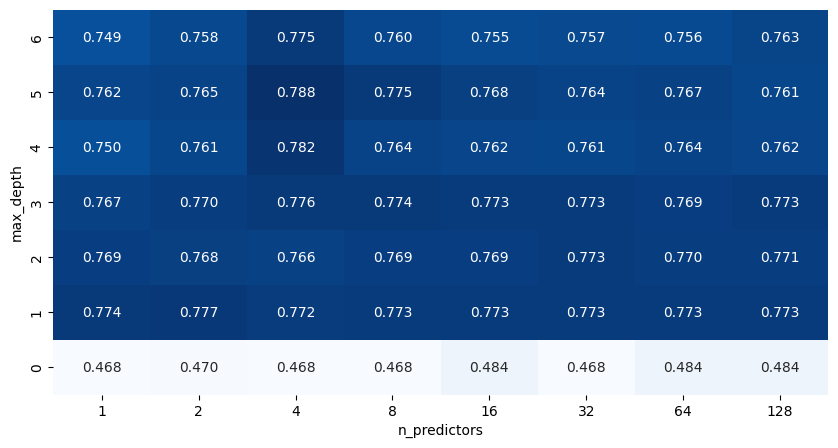

In [15]:
# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

results_df = []
for max_depth, n_predictors in results:
    for i, score in enumerate(results[(max_depth, n_predictors)]):
        results_df.append({"max_depth": max_depth, "n_predictors": n_predictors, "accuracy": score, "fold": i})

results_df = pd.DataFrame(results_df)

results_df = results_df.groupby(["max_depth", "n_predictors"]).mean().reset_index()
results_df = results_df.pivot(index="max_depth", columns="n_predictors", values="accuracy")
results_df = results_df.sort_index(ascending=False)

plt.figure(figsize=(10, 5))
sns.heatmap(results_df, cmap="Blues", annot=True, fmt=".3f", cbar=False)